In [24]:
# Imports
import data_preprocessing as dp
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

In [25]:
# Importing the data
data = dp.data_preprocessing('project_train.csv')

# Remove colum 'key'
data = data.drop(['key'], axis=1)

# Splitting the data into X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## 1/ Relevant parameters
### (a) Gaussian kernels
First, we want to get an idea of what are the relevant values for the parameters for the gaussian kernel and the polynomial kernel. We start we gaussian kernels and continue with polynomial kernels.

In [26]:
def svm_rbf(X_tain, X_test, y_train, y_test, C, gamma):
    clf = SVC(C=C, kernel='rbf', gamma=gamma)
    clf.fit(X_tain, y_train)
    return clf.score(X_test, y_test)

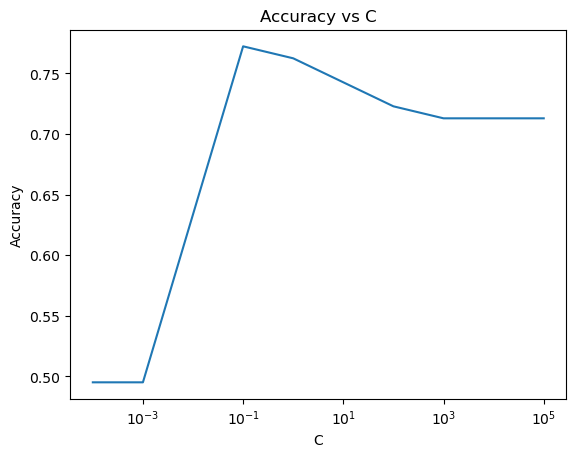

In [27]:
# Parameter C
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
accuracies_C = []
for c in C:
    accuracies_C.append(svm_rbf(X_train, X_test, y_train, y_test, c, 'scale'))
    
# Plotting the results
plt.plot(C, accuracies_C)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Accuracy vs C')
plt.show()

From this, we estimate relevant values of $C$ for gaussian kernels are: $$C_g= [0.1, 1, 10, 100, 1000].$$

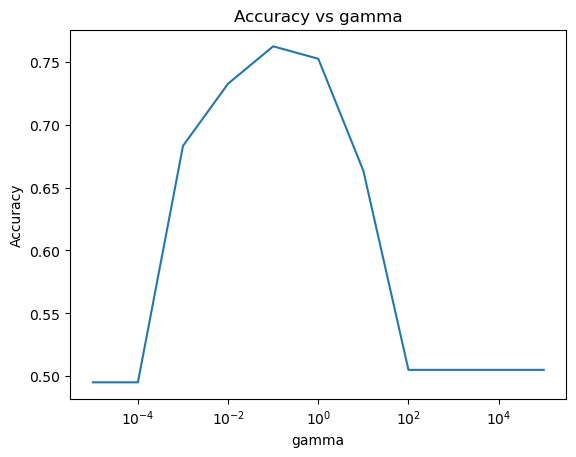

In [28]:
# Parameter gamma
gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
accuracies_gamma = []
for g in gamma:
    accuracies_gamma.append(svm_rbf(X_train, X_test, y_train, y_test, 1, g))

# Plotting the results
plt.plot(gamma, accuracies_gamma)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Accuracy vs gamma')
plt.show()

From this, we estimate relevant values of $\gamma$ for gaussian kernels are: $$\gamma_g= [0.001, 0.01, 0.1, 1, 10].$$

### (b) Polynomial kernels

In [29]:
def svm_poly(X_tain, X_test, y_train, y_test, C, degree, gamma):
    clf = SVC(C=C, kernel='poly', degree=degree, gamma=gamma)
    clf.fit(X_tain, y_train)
    return clf.score(X_test, y_test)

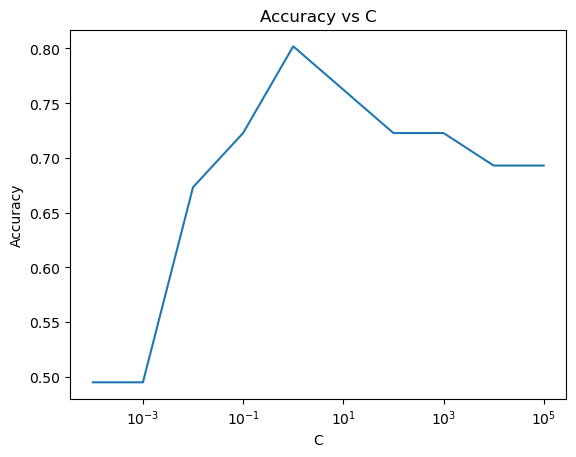

In [30]:
# Parameter C
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
accuracies_C = []
for c in C:
    accuracies_C.append(svm_poly(X_train, X_test, y_train, y_test, c, 3, 'scale'))

# Plotting the results
plt.plot(C, accuracies_C)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Accuracy vs C')
plt.show()

From this, we estimate relevant values of $C$ for polynomial kernels are: $$C_p= [1, 10, 50, 100, 1000].$$

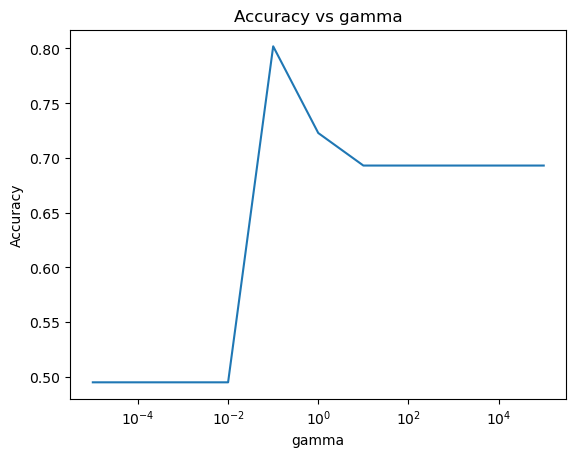

In [31]:
# Parameter gamma
gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
accuracies_gamma = []
for g in gamma:
    accuracies_gamma.append(svm_poly(X_train, X_test, y_train, y_test, 1, 3, g))

# Plotting the results
plt.plot(gamma, accuracies_gamma)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Accuracy vs gamma')
plt.show()

From this, we estimate relevant values of $\gamma$ for polynomial kernels are: $$\gamma_p= [0.1, 0.5, 1, 5, 10].$$

## 2/ Comparaison between gaussian kernels and polynomial kernels

In [32]:
def svm_gaussian_cv(X_train, X_test, y_train, y_test, params, custom_cv):
    # Initialize the classifier with Gaussian (RBF) kernel
    classifier = SVC(kernel='rbf')
    
    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, scoring='accuracy', n_jobs=-1, cv=custom_cv)
    grid_search = grid_search.fit(X_train, y_train)
    
    # Get best parameters
    best_params = grid_search.best_params_
    
    # Get the index of the best parameters
    best_index = grid_search.best_index_
    
    # Get the associated mean and standard deviation of the best parameters
    best_mean = grid_search.cv_results_['mean_test_score'][best_index]
    best_std = grid_search.cv_results_['std_test_score'][best_index]
    
    # Evaluate the best estimator on the test set
    best_estimator = grid_search.best_estimator_
    test_accuracy = accuracy_score(y_test, best_estimator.predict(X_test))
    
    return best_params, best_mean, best_std, test_accuracy 
    

In [33]:
# Define the parameters for the grid search
params_g = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}

custom_cv = StratifiedKFold(n_splits=5)

# Perform the grid search
best_params, best_mean, best_std, test_accuracy = svm_gaussian_cv(X_train, X_test, y_train, y_test, params_g, custom_cv)

# Print the results
print('Best parameters:', best_params)
print('Best parameters mean:', best_mean)
print('Best parameters std:', best_std)
print('Test accuracy:', test_accuracy)

Best parameters: {'C': 100, 'gamma': 0.01}
Best parameters mean: 0.8428703703703704
Best parameters std: 0.030308484825219317
Test accuracy: 0.7623762376237624


In [34]:
def poly_svm_cv(X_train, X_test, y_train, y_test, params, custom_cv):
    # Initialize the classifier with Polynomial kernel
    classifier = SVC(kernel='poly')
    
    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, scoring='accuracy', n_jobs=-1, cv=custom_cv)
    grid_search = grid_search.fit(X_train, y_train)
    
    # Get best parameters
    best_params = grid_search.best_params_
    
    # Get the index of the best parameters
    best_index = grid_search.best_index_
    
    # Get the associated mean and standard deviation of the best parameters
    best_mean = grid_search.cv_results_['mean_test_score'][best_index]
    best_std = grid_search.cv_results_['std_test_score'][best_index]
    
    # Evaluate the best estimator on the test set
    best_estimator = grid_search.best_estimator_
    test_accuracy = accuracy_score(y_test, best_estimator.predict(X_test))
    
    return best_params, best_mean, best_std, test_accuracy

In [35]:
# # Define the parameters for the grid search
# params_p = {'C': [1, 10, 100], 'gamma': [0.5, 1, 5], 'degree': [2, 3]}

# custom_cv = StratifiedKFold(n_splits=5)

# # Perform the grid search
# best_params, best_mean, best_std, test_accuracy = poly_svm_cv(X_train, X_test, y_train, y_test, params_p, custom_cv=custom_cv)

# # Print the results
# print('Best parameters:', best_params)
# print('Best parameters mean:', best_mean)
# print('Best parameters std:', best_std)
# print('Test accuracy:', test_accuracy)

Both kernels have similar results but gaussian have faster optimal parameter search. Thus we only focuse on gaussian kernels in the following.

# 3/ Dimensionality reduction with PCA

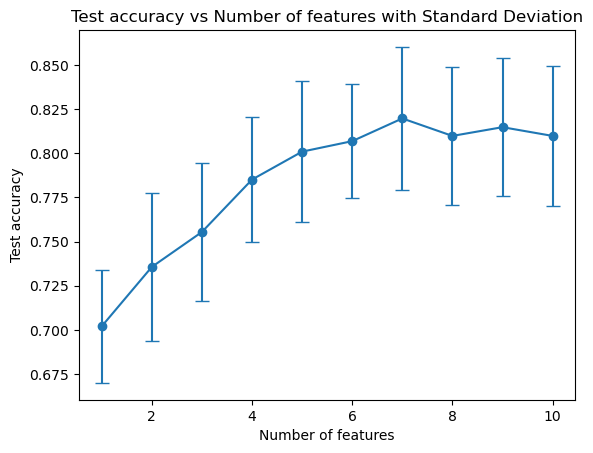

In [36]:
import numpy as np
# Custom cross-validation strategy
custom_cv = StratifiedKFold(n_splits=5)

# Initialize lists to store accuracies and standard deviations
accuracies_test = [[] for _ in range(10)]
std_test = [0]*10

# Draw distincts random states
np.random.seed(0)
random_states = np.random.randint(0, 1000, 10)
    
# Perform the grid search for each random state
for random_state in random_states:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

    # Loop over the number of features to reduce using PCA
    for nb_features in range(1, 11):
        # Perform PCA
        pca = PCA(n_components=nb_features)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Perform the grid search
        best_params, _, _, test_accuracy = svm_gaussian_cv(X_train_pca, X_test_pca, y_train, y_test, params_g, custom_cv)
        
        # Store the test accuracy for each feature set
        accuracies_test[nb_features-1].append(test_accuracy)

# Calculate the mean and standard deviation for each number of features
mean_accuracies = [np.mean(acc) for acc in accuracies_test]
std_accuracies = [np.std(acc) for acc in accuracies_test]

# Plot the results with error bars
plt.errorbar(range(1, 11), mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5)
plt.xlabel('Number of features')
plt.ylabel('Test accuracy')
plt.title('Test accuracy vs Number of features with Standard Deviation')
plt.show()

From this graph, it seems that the best number of components for the PCA is 7.